# Linear Regression

## Introduction
<p>Usually Linear Regression is a simple but effective model that finds a wide range of uses. As the name suggests a linear regression model assumes linearity in its inputs. The main use for it is to model the relationship between a scalar response (or dependent variable) $y$ and one or more explanatory variables (or independent variables) $x_1,x_2,..x_n$. In the case of one explanatory variable the model is called *Simple Linear Regression*. For more than one explanatory variable, the process is called *Multiple Linear Regression*.</p>
Theoretically speaking, when modelling the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values — $E(Y|X) = f(X)$ , where $X$ the dataset in matrix form ( also known as the design matrix) with m rows for the observations and n dimentions for the feature columns. Knowing that, we can define a regression problem that looks like this:
$$y = f(X)+ \epsilon$$
where $x\in \mathbb{R}^n$ are inputs and $y\in \mathbb{R}$ are the observed function values. <br>




The model itself has the form 
$$y = f(X) + \epsilon\\$$
    $$= 1\theta_0+x_{i1}\theta_1+...+x_{ij}\theta_m+\epsilon,\quad\quad \text{ $i = 1,2,...,m$}.\\$$
   $$ = X\theta + \epsilon$$
<br>
<br>
where the response variable is $y = \begin{pmatrix}y_1 \\ y_2 \\ \vdots\\y_m\end{pmatrix}$, the dataset is the matrix $X = \begin{pmatrix}x_1^T \\ x_2^T\\ \vdots \\x_m^T \end{pmatrix} = \begin{pmatrix}1&x_{11}&\cdots & x_{1n}  \\ 1&x_{21}&\cdots & x_{2n}\\\vdots&\vdots&\ddots&\vdots\\1&x_{m1}&\cdots & x_{mn} \end{pmatrix}$, the parameter vector is $\theta = \begin{pmatrix}\theta_0 \\ \theta_1 \\ \vdots \\\theta_m\end{pmatrix}$ and the error vector is $\epsilon = \begin{pmatrix}\epsilon_1 \\\epsilon_2 \\ \vdots\\\epsilon_m\end{pmatrix}$ . <br>

In order to find the best parameter vector $\theta$ that fits closest to the original $y$ we need to minimize a loss function. This function would be the *Sum of Squared Errors* (*SSE*) which is often denoted as $\mathcal{L}$ and defined as 

$$\mathcal{L}(\theta) = \sum_{i=1}^n (y_i - x_i^T\theta)^2$$

$$\mathcal{L}(\theta) = (y - X\theta)^T(y - X\theta) = (y^T-\theta^TX^T)(y-X\theta)$$


We want to minimize this function and we do so by setting the derivative to zero and algebraicly getting a solution. This method is also known as the Least Squares Solution.

$$0 = \frac{d\mathcal{L}}{d \theta} = \frac{d}{d\theta}(y^Ty - \theta^TX^Ty - y^TX\theta +\theta^TX^T X\theta)$$

$$-X^Ty- X^Ty + 2X^TX\theta = 2X^TX\theta-2X^Ty = 0$$

$$2X^TX\theta = 2X^Ty$$

$$X^TX\theta = X^Ty$$

$$(X^TX)^{-1} X^TX\theta = (X^TX)^{-1} X^Ty$$

$$\theta = (X^TX)^{-1} X^Ty$$

$$\hat{y}=X\theta=X(X^TX)^{-1}X^Ty$$

$$Var(\theta) = Var((X^TX)^{-1} X^Ty) = (X^TX)^{-1} X^TVar(y)X(X^TX)^{-1}$$

$$Var(y) = \sigma^2I$$

$$(X^TX)^{-1} X^T\sigma^2IX(X^TX)^{-1} =\sigma^2(X^TX)^{-1} X^TX(X^TX)^{-1}=\sigma^2(X^TX)^{-1}$$

First we need to import the needed python modules.

In [57]:
%matplotlib inline 
# Magics that tells the plots appear inside the notebook
import numpy as np # Linear Algebra module
import matplotlib.pyplot as plt # Data Visualization module
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

We then generate some data to experiment with.

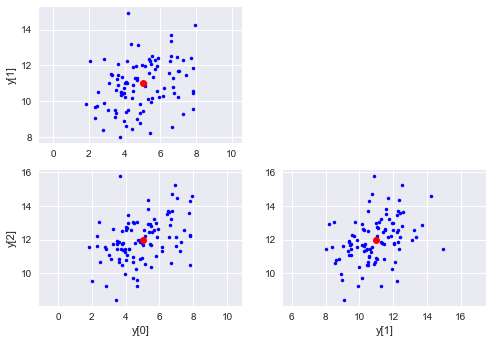

In [58]:
num_samples = 100

# The mean values of x and y .
mu = np.array([5, 11, 12])

# The desired covariance matrix.
cov = np.array([
        [  2., 0.85, 0.95],
        [ 0.85,  2., 0.9],
        [0.95, 0.9, 2.]
    ])

# Generate the random samples.
df = np.random.multivariate_normal(mu, cov, size=num_samples)

# Plot various projections of the samples.
plt.subplot(2,2,1)
plt.plot(df[:,0], df[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.ylabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(df[:,0], df[:,2], 'b.')
plt.plot(mu[0], mu[2], 'ro')
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(df[:,1], df[:,2], 'b.')
plt.plot(mu[1], mu[2], 'ro')
plt.xlabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

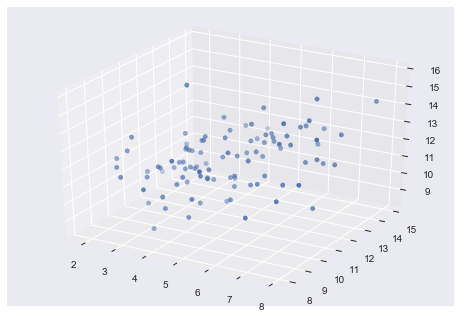

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[:,0], df[:,1], df[:,2])

In [61]:
np.shape(df)
y = df[:,2]
X = np.delete(df, 2, 1)
print(y)
print(np.shape(X))


[13.80233121 12.49311427 12.55388636  9.70662449 13.01636179 11.24469752
 11.84363222 13.7133449   9.93859155 13.45186133 11.85054887 14.59586488
 10.83772503  8.45127148 10.79881646 12.99408655 10.6686843  12.43087259
  9.26818469 10.50663425 10.6774813  11.79357759 11.45723129 14.48693
 13.52202636 14.68787753 13.22476214 12.63857432 12.94022144 11.35655993
 11.86177438 11.75387017 12.9127168  11.70709371 11.42289093 11.0698668
 13.03191101 10.83247541 14.33052381 11.97025535 12.99968186  9.6274781
 10.39535948 12.19578689 15.7565137  11.65285106 13.03162585 12.71883021
 12.21584573 11.73758524  9.25443327 12.61265993 10.96114107 12.2424228
 12.15385882 11.79561102 12.83399285 12.8729406  13.2096839  11.58680534
 12.55284439 12.29366857 10.48425783 13.56205656 13.61050393 12.70561562
 11.74468486 15.24993971 12.5584006  11.45408038 11.78725213 13.00082344
 11.31147479 10.54446901 11.46741152 11.90648066 12.57033576 12.42097514
 10.23738205 11.04498584 11.95554758 11.0748919  10.91003

In [62]:
# create vector of ones...
I = np.ones(shape=y.shape)[..., None]

#...and add to feature matrix
X = np.concatenate((I, X), 1)
print(X[0:5])

[[ 1.          5.34010703 11.5593745 ]
 [ 1.          3.79897485 10.5100303 ]
 [ 1.          4.33152225 13.20354839]
 [ 1.          4.41267448 10.14995754]
 [ 1.          4.70215929 11.16832027]]


In [63]:
# calculate coefficients using closed-form solution
coeffs = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(coeffs)

[7.76852031 0.29090655 0.25604057]


In [68]:
def predict(X, theta):
    return X.dot(theta)

yhat = predict(X,coeffs)

print(yhat)

[12.28166124 11.56466111 12.40923254 11.65099712 11.99595232 11.66165275
 13.02467537 12.41268161 11.19431995 12.09827293 11.69470076 13.72770072
 11.75272099 11.1003097  11.14384355 12.12025125 11.90908176 12.47767534
 11.13039825 11.56690649 11.18515996 11.78279071 12.81192283 12.81947409
 12.60344671 12.48231606 12.60872085 12.10340832 11.44876552 11.53768607
 11.57588392 11.21743706 11.91178444 11.65118351 11.7509191  11.3592821
 11.22476157 11.49294606 12.47886123 12.50949633 11.79244499 11.42225787
 11.91282472 13.07674316 11.61600056 11.97478294 10.9748778  11.763204
 12.09139967 12.44299596 12.02231479 11.65546753 11.76236271 10.92175883
 12.64984485 11.98915055 12.57466124 13.19723393 12.43732987 12.31367785
 12.87066273 12.48638663 12.72144272 13.19563479 12.89268165 11.78714267
 11.51692178 12.9776152  12.32240823 11.59550974 12.29042123 12.52588082
 12.25776114 12.04845408 11.42650313 11.18287453 11.56229453 12.30363532
 12.16973656 12.16481404 11.70533136 11.08802422 12.02

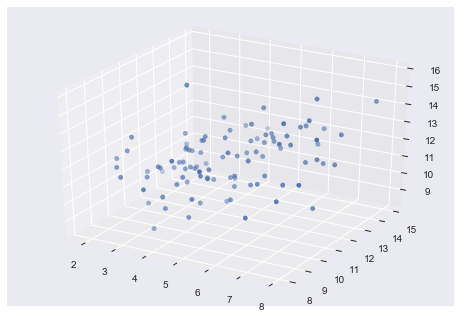

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface

ax.scatter(df[:,0],df[:,1],df[:,2])

plt.show()


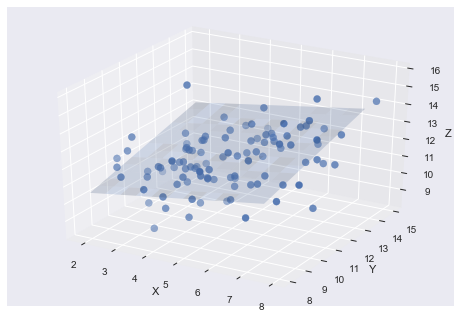

In [86]:
# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(2, 8, 0.5), np.arange(8, 15, 0.5))
XX = X.flatten()
YY = Y.flatten()
# evaluate it on grid
Z = coeffs[2]*X + coeffs[1]*Y + coeffs[0]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(df[:,0], df[:,1], df[:,2], s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

## Asumptions

In order for a linear model to work as expected there are a number of assumptions that is adviced to take into account. 


- *Weak exogeneity*. This essentially means that the predictor variables x can be treated as fixed values, rather than random variables. This also implies that the predictor variables are assumed to be error-free—that is, not contaminated with measurement errors. 
- Linearity. This means that the mean of the response variable is a linear combination of the parameters (regression coefficients) and the predictor variables. (Note that $y = \theta_0 + x_1\theta_1+ x_2^2\theta_2$ doesnt violate this assumption even though it has a polynomial)
- Constant variance (a.k.a. homoscedasticity). This means that different values of the response variable have the same variance in their errors, regardless of the values of the predictor variables.*
- Independence of errors. This assumes that the errors of the response variables are uncorrelated with each other. (Actual statistical independence is a stronger condition than mere lack of correlation and is often not needed, although it can be exploited if it is known to hold.) *

## Anscombe's Quartet

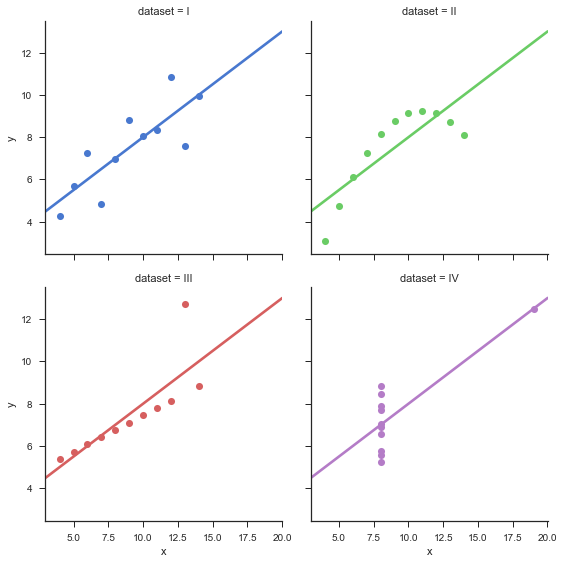

In [8]:

import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})
